## Fashion MNIST experiments

We use two models for this problem: Multi-Layer Perceptron and Convolution Neural Network. To visualize the information plane, considering the limited computation power, we choose the MLP approach and compute encoder/decoer mututal information based on a fraction of training data. 

### Model 1: Multilayer perceptron w/ Batch Normalization

In [1]:
from utils import load_mnist
import utils
import numpy as np
from mlp import Layer, LayerArgs, Model, ModelArgs
from collections import Counter
import math
from mi_tool import MI
import plot_tool
reload(utils)

<module 'utils' from 'utils.pyc'>

In [2]:
%matplotlib inline

In [3]:
X_train, y_train = load_mnist('../fashion_mnist/', kind='train')
X_test, y_test = load_mnist('../fashion_mnist/', kind='t10k')

# normalize inputs
X_train, X_test = np.multiply(X_train, 1.0 / 255.0), np.multiply(X_test, 1.0 / 255.0)
X_train, y_train = utils.randomize_copies(X_train, y_train)
X_test, y_test = utils.randomize_copies(X_test, y_test)
X_train_subset, y_train_subset = X_train[:5000], y_train[:5000]

In [7]:
# define the network structure with 2 hidden layers of dimension 100 and 20. 
# other parameters were set to default, activation function is set to RELU by default. 

layer_args = [LayerArgs(784, 784, layer_type = "INPUT"), \
              LayerArgs(784, 50), \
              LayerArgs(50, 25), \
              LayerArgs(25, 15), \
              LayerArgs(15, 10, layer_type = "OUTPUT", activate = np.exp)]

# our model is using mini-batch gradient descent
# set max #(epoch) as 80 and max #(iteration) as 100000;
# For everay 1000 iterations, we compute (and plot) MI;
model_args = ModelArgs(num_passes = 80, max_iter=100000, report_interval=500)

# intialize the model
# TODO: model weights intialization by denoised autoencoder

model = Model(layer_args, model_args)
model.feed_data(X_train, y_train, X_test, y_test)
model.trial_data(X_train_subset, y_train_subset)
model.intialize_model()

In [8]:
MI_client = MI(X_train_subset, y_train_subset, 10)
MI_client.discretize()
MI_client.pre_compute()

In [9]:
for epoch, hidden_layers in model.run_model():
    MI_client.mi_single_epoch(hidden_layers, epoch)

Epoch: 1, Train Acc: 0.10465, Test Acc: 0.0998
Epoch: 2, Train Acc: 0.106733333333, Test Acc: 0.1029
Epoch: 3, Train Acc: 0.109633333333, Test Acc: 0.0979
Epoch: 4, Train Acc: 0.109166666667, Test Acc: 0.1049
Epoch: 5, Train Acc: 0.112016666667, Test Acc: 0.1004
Epoch: 6, Train Acc: 0.113566666667, Test Acc: 0.0958
Epoch: 7, Train Acc: 0.114233333333, Test Acc: 0.0954
Epoch: 8, Train Acc: 0.117, Test Acc: 0.0959
Epoch: 9, Train Acc: 0.116, Test Acc: 0.0958
Epoch: 10, Train Acc: 0.118516666667, Test Acc: 0.0896
Epoch: 11, Train Acc: 0.118883333333, Test Acc: 0.0955
Epoch: 12, Train Acc: 0.119583333333, Test Acc: 0.0976
Epoch: 13, Train Acc: 0.12105, Test Acc: 0.093
Epoch: 14, Train Acc: 0.12365, Test Acc: 0.0977
Epoch: 15, Train Acc: 0.123733333333, Test Acc: 0.0993
Epoch: 16, Train Acc: 0.124183333333, Test Acc: 0.1
Epoch: 17, Train Acc: 0.1253, Test Acc: 0.0984
Epoch: 18, Train Acc: 0.1277, Test Acc: 0.0959
Epoch: 19, Train Acc: 0.1263, Test Acc: 0.096
Epoch: 20, Train Acc: 0.12988333

### Model 2: Convolution Neural Network (PyTorch)

For the second model, we use the classical CNN with PyTorch. The code is fairly simple as we are using libraries. 

#### please refer to this notebook for code and results [link](https://github.com/LargePanda/Information-Bottleneck-for-Deep-Learning/blob/master/CNN.ipynb)

### Analysis: Information Bottleneck

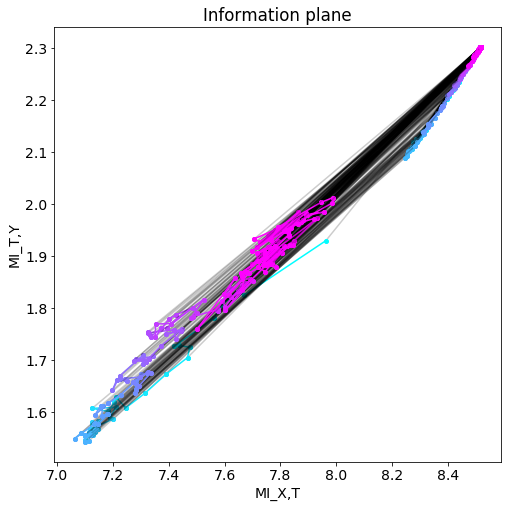

In [10]:
reload(plot_tool)
plot_tool.mi_plot(MI_client)

### Analysis: Visualization of accuracy v.s. epoches

In [ ]:
plot_tool.plot(model.train_log_acc, model.test_log_acc)